In [1]:
import gzip
import tarfile
import shutil
from io import BytesIO
from pathlib import Path

import pandas as pd
import numpy as np
from transformers import SiglipProcessor, SiglipModel
from PIL import Image

## Functions to deal with archived file

In [1]:
def extract_gzip(compressed):
    compressed = Path(compressed)
    if (out_file := compressed.parent / compressed.stem).exists():
        return

    with gzip.open(compressed, "rb") as compressed, open(out_file, "wb") as uncompressed:
        shutil.copyfileobj(compressed, uncompressed)

def open_from_tarfile(archive, internal_file):
    with tarfile.open(archive) as tar:
        f = tar.extractfile(tar.getmember(internal_file))
        return BytesIO(f.read())

In [ ]:
extract_gzip("public_data.tar.gz")

## Load metadata

In [4]:
data_tar = "public_data.tar"
metadata = pd.read_parquet(open_from_tarfile(data_tar, "metadata.parquet"))
metadata

,SigLIP,access,authors,title,publisher,published_year,tags,language,document_type,udc,...,page_urn,image_url,urn,file_name,public_domain,genres,issn,dewey,original_title,isbn
0,"[-0.19418165, 0.33022, 0.3288203, 0.2382887, 0...",Tilgang for alle,"Egede, Hans",Egedes Dagbog i Udtog,Selskabet,1860.0,"[Misjon, Biografier, arktis, grønland, misjon,...",Norsk (Bokmål),Bøker,"92, 903(988), 266(988), 92Egede",...,URN:NBN:no-nb_digibok_2006080900007_0001,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2006080900007,no-nb_digibok_2006080900007_0001_x917y1709w728...,True,None,None,None,None,None
1,"[0.026854128, -0.35907537, -0.27780342, 0.0115...",Tilgang for alle,"Egede, Hans",Egedes Dagbog i Udtog,Selskabet,1860.0,"[Misjon, Biografier, arktis, grønland, misjon,...",Norsk (Bokmål),Bøker,"92, 903(988), 266(988), 92Egede",...,URN:NBN:no-nb_digibok_2006080900007_0002,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2006080900007,no-nb_digibok_2006080900007_0002_x0y0w1621h284...,True,None,None,None,None,None
2,"[-0.2752392, 0.038039267, 0.27442914, 0.416706...",Tilgang for alle,"Egede, Hans",Egedes Dagbog i Udtog,Selskabet,1860.0,"[Misjon, Biografier, arktis, grønland, misjon,...",Norsk (Bokmål),Bøker,"92, 903(988), 266(988), 92Egede",...,URN:NBN:no-nb_digibok_2006080900007_0003,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2006080900007,no-nb_digibok_2006080900007_0003_x688y2385w892...,True,None,None,None,None,None
3,"[-0.27163577, -0.8133491, -0.33826834, -0.1910...",Tilgang for alle,"Egede, Hans",Egedes Dagbog i Udtog,Selskabet,1860.0,"[Misjon, Biografier, arktis, grønland, misjon,...",Norsk (Bokmål),Bøker,"92, 903(988), 266(988), 92Egede",...,URN:NBN:no-nb_digibok_2006080900007_0004,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2006080900007,no-nb_digibok_2006080900007_0004_x0y1741w453h4...,True,None,None,None,None,None
4,"[-0.11252877, 0.21677154, 0.43298995, 0.213421...",Tilgang for alle,"Egede, Hans",Egedes Dagbog i Udtog,Selskabet,1860.0,"[Misjon, Biografier, arktis, grønland, misjon,...",Norsk (Bokmål),Bøker,"92, 903(988), 266(988), 92Egede",...,URN:NBN:no-nb_digibok_2006080900007_0005,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2006080900007,no-nb_digibok_2006080900007_0005_x919y1707w728...,True,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422584,"[0.0072751045, -0.5070705, -0.1902383, -0.6103...",Tilgang for alle,"Sommerfeldt, Hakon Adelsteen | Steen, Frederik...",Om Handelsskibes Construction,Paa H. Tobieson's Forlag. Trykt hos F.T. Steen,1845.0,"[Skipsbygging, 1800-tallet, handelsskip]",Dansk,Bøker,None,...,URN:NBN:no-nb_digibok_2020091029001_0047,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2020091029001,no-nb_digibok_2020091029001_0047_x2856y2286w25...,True,None,None,None,None,None
422585,"[0.019102216, -0.77286136, 0.46672645, -0.1173...",Tilgang for alle,"Sommerfeldt, Hakon Adelsteen | Steen, Frederik...",Om Handelsskibes Construction,Paa H. Tobieson's Forlag. Trykt hos F.T. Steen,1845.0,"[Skipsbygging, 1800-tallet, handelsskip]",Dansk,Bøker,None,...,URN:NBN:no-nb_digibok_2020091029001_0049,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2020091029001,no-nb_digibok_2020091029001_0049_x1568y63w1287...,True,None,None,None,None,None
422586,"[0.24767205, -0.30420873, -0.1003335, 0.101632...",Tilgang for alle,"Sommerfeldt, Hakon Adelsteen | Steen, Frederik...",Om Handelsskibes Construction,Paa H. Tobieson's Forlag. Trykt hos F.T. Steen,1845.0,"[Skipsbygging, 1800-tallet, handelsskip]",Dansk,Bøker,None,...,URN:NBN:no-nb_digibok_2020091029001_0049,https://www.nb.no/services/image/resolver/URN:...,URN:NBN:no-nb_digibok_2020091029001,no-nb_digibok_2020091029001_0049_x7y853w2535h3...,True,None,None,None,None,None
422587,"[-0.74073696, -0.47443652, -0.117832586, -0.38...",Tilgang for alle,"S

## Stack embeddings to a big matrix and normalize

In [5]:
# Get SigLIP embedding matrix
embeddings = np.stack(metadata["SigLIP"].values)
normalized = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
embeddings.shape

(363061, 768)

## Load SigLIP model

In [6]:
processor = SiglipProcessor.from_pretrained("google/siglip-base-patch16-256-multilingual")
model = SiglipModel.from_pretrained("google/siglip-base-patch16-256-multilingual")

## Open an image

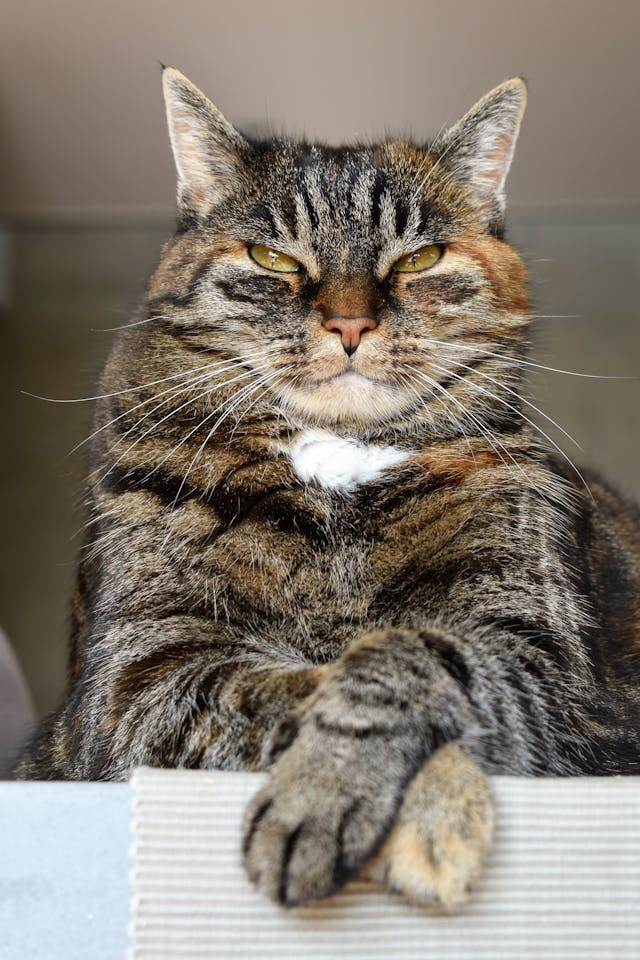

In [16]:
# Open image
image = Image.open("pexels-pixabay-208984.jpg")
image

## Use the SigLIP preprocessing

In [17]:
preprocessed = processor(images=image)
preprocessed

{'pixel_values': tensor([[[[ 0.2314,  0.2314,  0.2314,  ...,  0.1059,  0.1059,  0.1059],
          [ 0.2235,  0.2235,  0.2235,  ...,  0.1059,  0.1059,  0.1059],
          [ 0.2157,  0.2157,  0.2157,  ...,  0.0980,  0.0980,  0.0980],
          ...,
          [ 0.6784,  0.6706,  0.7020,  ...,  0.6314,  0.6078,  0.5843],
          [ 0.6627,  0.6392,  0.6471,  ...,  0.7333,  0.7098,  0.6784],
          [ 0.6706,  0.6549,  0.6549,  ...,  0.6941,  0.6706,  0.6392]],

         [[ 0.0824,  0.0824,  0.0824,  ..., -0.0196, -0.0196, -0.0196],
          [ 0.0745,  0.0745,  0.0745,  ..., -0.0196, -0.0196, -0.0196],
          [ 0.0667,  0.0667,  0.0667,  ..., -0.0275, -0.0275, -0.0275],
          ...,
          [ 0.8039,  0.7961,  0.8275,  ...,  0.6549,  0.6314,  0.6157],
          [ 0.7882,  0.7647,  0.7725,  ...,  0.7882,  0.7569,  0.7333],
          [ 0.7961,  0.7804,  0.7804,  ...,  0.7255,  0.6941,  0.6706]],

         [[-0.0353, -0.0353, -0.0353,  ..., -0.1216, -0.1216, -0.1216],
          [-0

## Compute the embedding vector

In [18]:
embedding = model.get_image_features(pixel_values=preprocessed["pixel_values"]).detach().cpu().numpy()
embedding

array([[ 1.07237434e+00, -3.31356704e-01, -3.53915751e-01,
        -5.16946912e-01, -6.89900875e-01,  2.29091138e-01,
        -2.93486893e-01, -1.90297693e-01, -3.59821290e-01,
         5.98696649e-01,  2.15211868e-01,  7.22614825e-02,
        -5.48010290e-01, -7.57327378e-01,  1.19425356e-01,
        -1.70174912e-01,  6.54884577e-02, -2.32772440e-01,
        -7.30741918e-01, -6.32017851e-02,  5.07597983e-01,
        -2.10864878e+00, -3.66529465e-01, -2.17398509e-01,
        -5.11865258e-01, -9.22052443e-01, -1.71694040e-01,
        -1.40547365e-01, -6.54556096e-01, -2.28764161e-01,
         2.29121238e-01, -3.45621407e-01, -4.70959783e-01,
         2.82108337e-01,  7.00303257e-01, -8.84930253e-01,
         8.20121765e-02,  6.63705170e-02, -1.46883130e-01,
         3.73981893e-01,  1.27276897e-01,  1.03171587e-01,
        -3.95781100e-02,  1.31231815e-01, -1.73815519e-01,
         3.04671317e-01, -7.92816281e-01,  3.49351406e-01,
         1.13173440e-01, -3.08812112e-01,  1.15608275e-0

## Find the most similar image (cosine similarity)

In [19]:
norm_embedding = embedding / np.linalg.norm(embedding)
sim = normalized @ norm_embedding.squeeze()

best_idx = sim.argmax()
record = metadata.iloc[best_idx]
record

SigLIP            [0.5336569, -0.307095, -0.034206137, -0.421134...
access                                             Tilgang for alle
authors                                          Steffen, Gustaf F.
title                                       Fra det moderne England
publisher                                 xx:Gyldendalske Boghandel
published_year                                               1894.0
tags                                                           None
language                                                      Dansk
document_type                                                 Bøker
udc                                                            None
license                                                publicdomain
page_urn                   URN:NBN:no-nb_digibok_2010042706049_0244
image_url         https://www.nb.no/services/image/resolver/URN:...
urn                             URN:NBN:no-nb_digibok_2010042706049
file_name         no-nb_digibok_2010042706049_02

## Look at the image

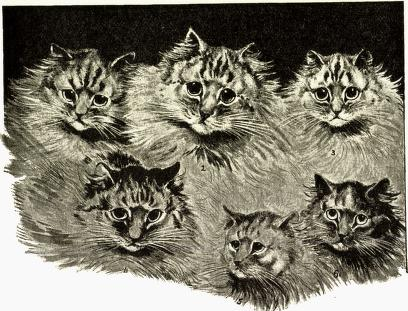

In [20]:
Image.open(open_from_tarfile(data_tar, Path("images" / record["file_name"])))